<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
# Load the Stack Overflow survey dataset
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [6]:
## Write your code here
print("Column Names:")
print (df.columns)

print("\nData Types:")
print (df.dtypes)

print("\nSummary Info:")
print (df.dtypes)

print("\nSummary Info:")
print (df.info())

print ("\nSummary Statistics for Numerical Columns:")
print (df.describe())

Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Info:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [9]:
## Write your code here
print("Missing Values in Each Column:")
print(df.isnull().sum())

print("\nPercentage of Missing Values:")
print((df.isnull().mean() * 100).round(2))

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

df = df.dropna(thresh=len(df) * 0.5, axis=1)


Missing Values in Each Column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10637
                       ...  
JobSatPoints_11        36006
SurveyLength            9259
SurveyEase              9202
ConvertedCompYearly    42020
JobSat                 36326
Length: 114, dtype: int64

Percentage of Missing Values:
ResponseId              0.00
MainBranch              0.00
Age                     0.00
Employment              0.00
RemoteWork             16.25
                       ...  
JobSatPoints_11        55.01
SurveyLength           14.15
SurveyEase             14.06
ConvertedCompYearly    64.19
JobSat                 55.50
Length: 114, dtype: float64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [10]:
## Write your code here

key_columns = ['Employment', 'JobSat', 'YearsCodePro']

for col in key_columns:
    print(f"\nValue Counts for '{col}':")
    print(df[col].value_counts(dropna=False))



Value Counts for 'Employment':
Employment
Employed, full-time                                                                                                                                   39051
Independent contractor, freelancer, or self-employed                                                                                                   4847
Student, full-time                                                                                                                                     4713
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3558
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but loo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


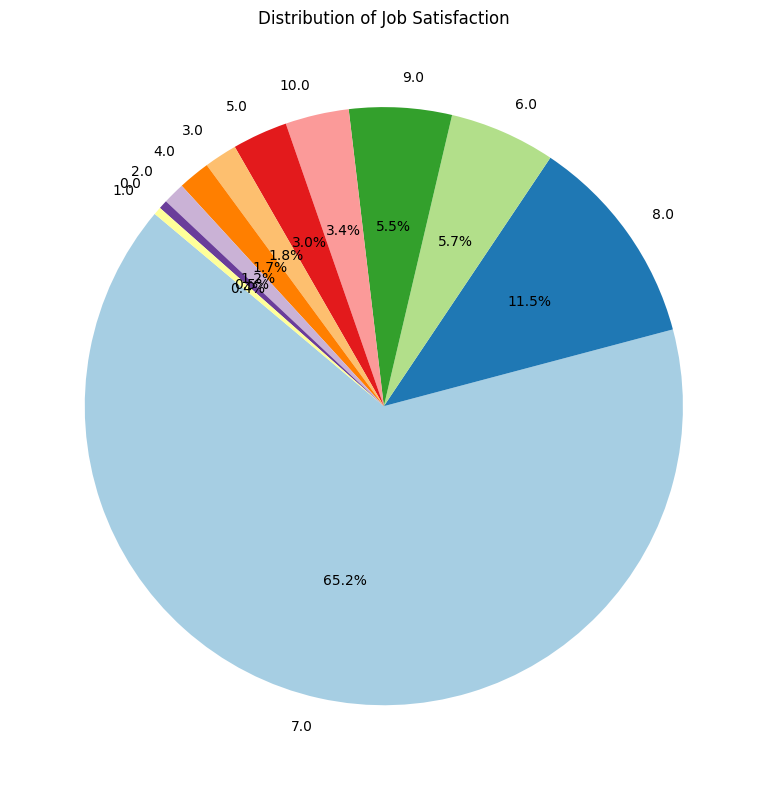

In [11]:
## Write your code 
job_sat_counts = df['JobSat'].value_counts(dropna=False)

plt.figure(figsize=(8, 8))
job_sat_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Job Satisfaction')
plt.ylabel('')  # Hides y-label for better look
plt.tight_layout()
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


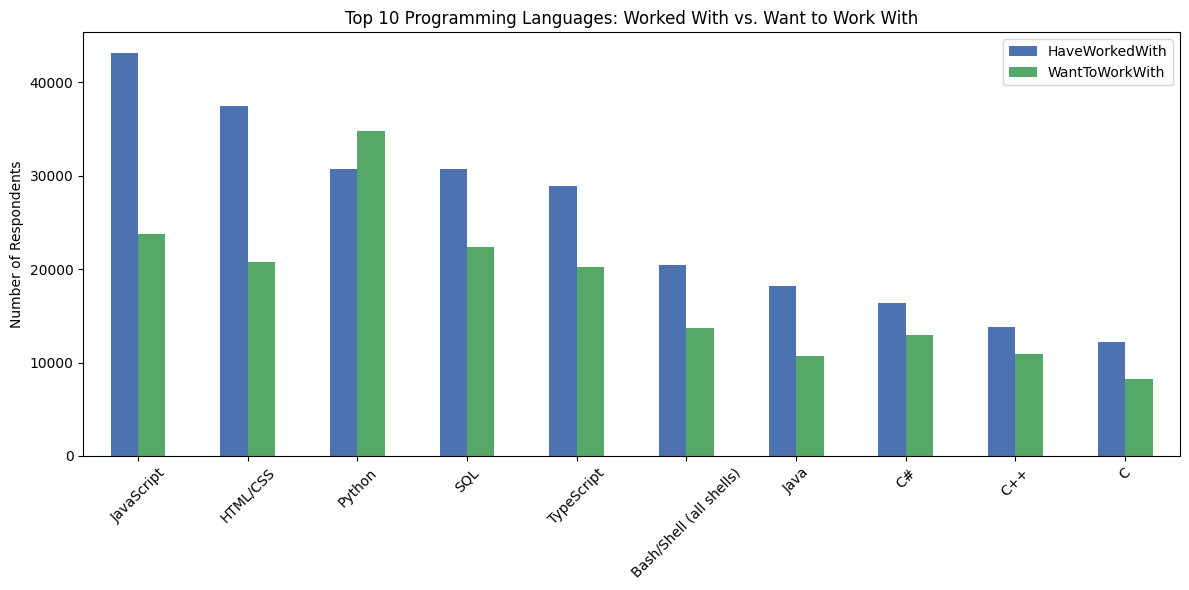

In [20]:
## Write your code here
def get_language_counts(series):
    all_langs = series.dropna().str.split(';')
    flat_list = [lang.strip() for sublist in all_langs for lang in sublist]
    return pd.Series(flat_list).value_counts()

worked_counts = get_language_counts(df['LanguageHaveWorkedWith'])
want_counts = get_language_counts(df['LanguageWantToWorkWith'])

lang_compare = pd.DataFrame({
    'HaveWorkedWith': worked_counts,
    'WantToWorkWith': want_counts
}).fillna(0).astype(int)

top_langs = lang_compare.sort_values(by='HaveWorkedWith', ascending=False).head(10)

top_langs.plot(kind='bar', figsize=(12, 6), color=['#4c72b0', '#55a868'])
plt.title('Top 10 Programming Languages: Worked With vs. Want to Work With')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


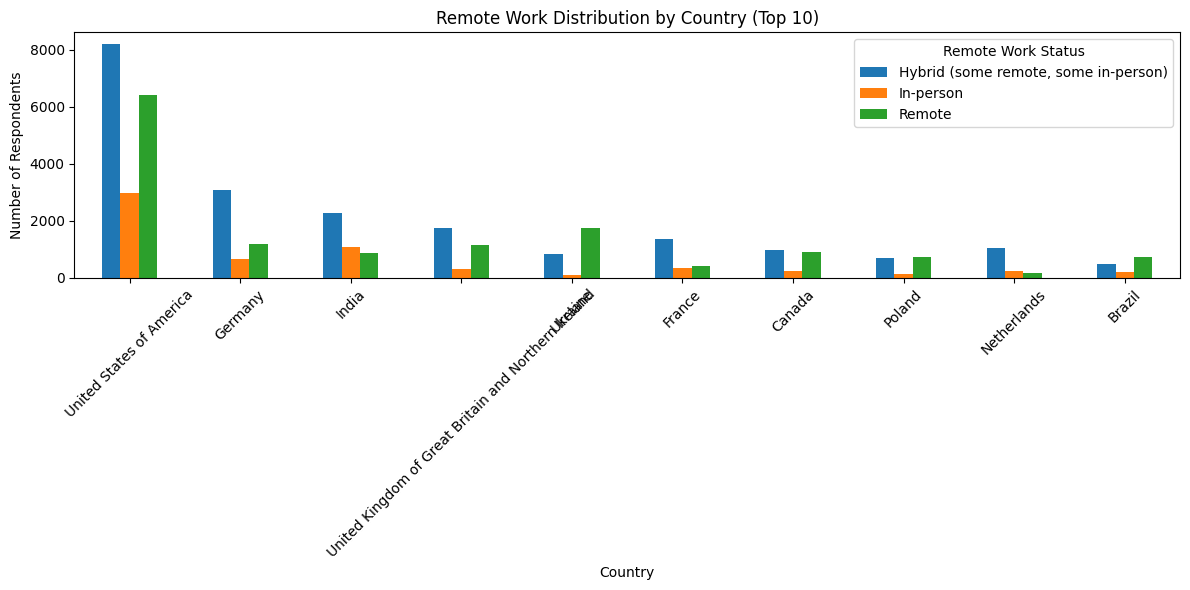

In [21]:
## Write your code here
remote_counts = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

top_countries = remote_counts.sum(axis=1).sort_values(ascending=False).head(10)
remote_top = remote_counts.loc[top_countries.index]

remote_top.plot(kind='bar', figsize=(12, 6))
plt.title('Remote Work Distribution by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Remote Work Status')
plt.tight_layout()
plt.show()

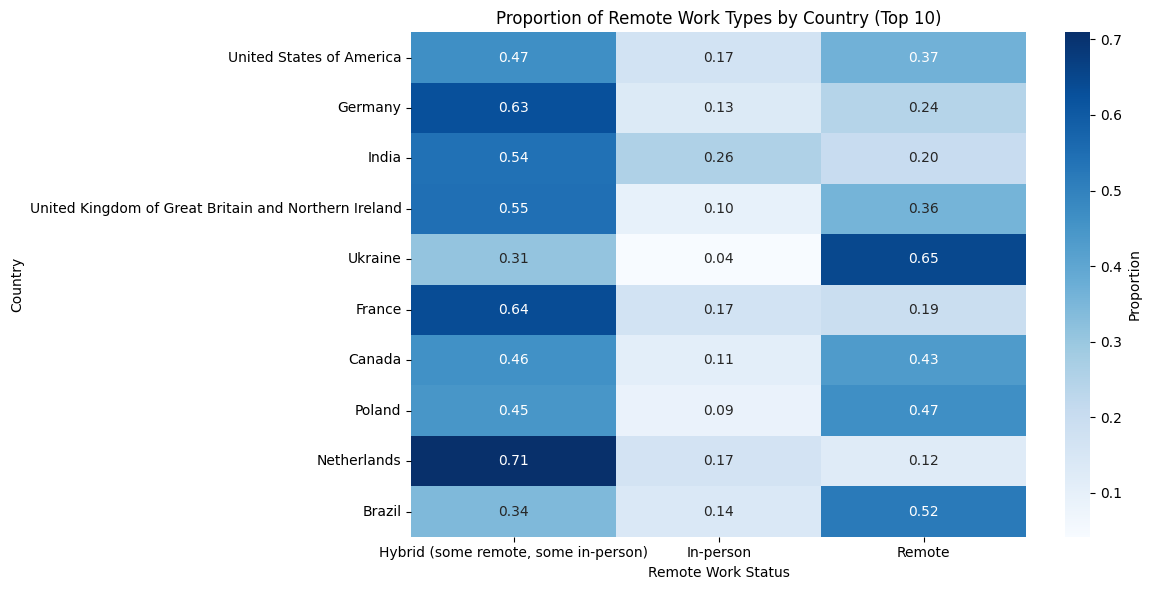

In [22]:
remote_prop = remote_top.div(remote_top.sum(axis=1), axis=0)


plt.figure(figsize=(12, 6))
sns.heatmap(remote_prop, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Proportion'})
plt.title('Proportion of Remote Work Types by Country (Top 10)')
plt.ylabel('Country')
plt.xlabel('Remote Work Status')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [26]:
## Write your code here

# Check unique JobSat values that were not mapped
print("Unique JobSat values (raw):")
print(df['JobSat'].dropna().unique())

# Check how many values were successfully mapped
print("\nJobSat_num value counts:")
print(df['JobSat'].map(job_sat_mapping).value_counts(dropna=False))

# Check non-numeric YearsCodePro entries
print("\nSample YearsCodePro values (raw):")
print(df['YearsCodePro'].dropna().unique())

# Step 1: Updated JobSat mapping
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Neutral': 3,
    'Satisfied': 4,
    'Very satisfied': 5
}
df['JobSat_num'] = df['JobSat'].map(job_sat_mapping)

# Step 2: Convert YearsCodePro to float
def convert_years(value):
    if pd.isna(value):
        return None
    if isinstance(value, str):
        value = value.strip()
        if value == 'Less than 1 year':
            return 0.5
        elif value == 'More than 50 years':
            return 51
        try:
            return float(value)
        except:
            return None
    return value

df['YearsCodePro_num'] = df['YearsCodePro'].apply(convert_years)

# Step 3: Drop rows with NaNs in either
df_corr = df[['JobSat_num', 'YearsCodePro_num']].dropna()

# Verify if data remains
print(f"\nRows after cleaning: {len(df_corr)}")

# Step 4: Correlation
if len(df_corr) > 0:
    pearson_corr = df_corr.corr(method='pearson').iloc[0, 1]
    spearman_corr = df_corr.corr(method='spearman').iloc[0, 1]
    print(f"\nPearson Correlation: {pearson_corr:.3f}")
    print(f"Spearman Correlation: {spearman_corr:.3f}")
else:
    print("Not enough data to compute correlation.")


Unique JobSat values (raw):
[ 7.  8.  5. 10.  6.  9.  4.  3.  2.  1.  0.]

JobSat_num value counts:
JobSat
NaN    65457
Name: count, dtype: int64

Sample YearsCodePro values (raw):
['2' '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33'
 '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44'
 '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']

Rows after cleaning: 0
Not enough data to compute correlation.


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [ ]:
## Write your code here

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
